How  have crime instances changed relative to the population?

In [3]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import pprint
from uszipcode import SearchEngine
from config import api_key
from census import Census

c:\Users\alici\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# Read in data from csv file
crime_df = pd.read_csv("Resources/chicago_crimes_all_cleaned.csv")
crime_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,MINOR PROPERTY CRIME,TO VEHICLE,STREET,False,False,...,19.0,74.0,14,1158309.0,1829936.0,2018,01/10/2019 03:16:50 PM,41.689079,-87.696064,"(41.689078832, -87.696064026)"
1,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,MINOR PROPERTY CRIME,TO PROPERTY,APARTMENT,False,False,...,21.0,71.0,14,1171454.0,1848783.0,2018,01/10/2019 03:16:50 PM,41.740521,-87.647391,"(41.740520866, -87.647390719)"
2,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,25.0,31.0,08B,1168327.0,1891230.0,2018,01/10/2019 03:16:50 PM,41.857068,-87.657625,"(41.857068095, -87.657625201)"
3,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,17.0,71.0,08B,1171332.0,1852934.0,2018,01/10/2019 03:16:50 PM,41.751914,-87.647717,"(41.75191443, -87.647716532)"
4,11552715,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,041A,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,29.0,25.0,04B,1140262.0,1897810.0,2018,03/28/2020 03:47:02 PM,41.875684,-87.760479,"(41.87568438, -87.760479356)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163207,12847575,JF420478,9/1/2022 5:00,005XX W SURF ST,2825,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,1/3/2023 15:46,41.934305,-87.641485,"(41.934304581, -87.641484982)"
1163208,12847801,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,1130,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,1/3/2023 15:46,41.685544,-87.616813,"(41.685543881, -87.616812541)"
1163209,12847324,JF420102,9/27/2022 11:00,023XX E 70TH ST,810,THEFT (ALL TYPES),OVER $500,RESIDENCE,False,False,...,5.0,43.0,6,1193181.0,1859005.0,2022,1/3/2023 15:46,41.768068,-87.567453,"(41.768068052, -87.567452932)"
1163210,12847570,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,2021,DRUG RELATED,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,1/3/2023 15:46,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [5]:
# Create a SearchEngine object 
search = SearchEngine()

In [6]:
# Define a function to get zip code from latitude and longitude
def fill_zip_code(row):
    # Use uszipcode's search by coordinates function, and set a small radius since we're only looking at Chicago
    result = search.by_coordinates(row['Latitude'], row['Longitude'], radius = 5)
    # If the result of the search is not empty
    if result:
        # Return the first element (zipcode) 
        return result[0].zipcode
    else:
        # If the result doesn't have a zipcode to pull, don't return anything
        return None

In [7]:
# Run the latitude and longitude through the function to get the zip code. Note: this takes an extremely long amount of time.
crime_df['Zipcode'] = crime_df.apply(fill_zip_code, axis=1)



In [8]:
# Check to make sure zip codes were filled
crime_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Zipcode
0,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,MINOR PROPERTY CRIME,TO VEHICLE,STREET,False,False,...,74.0,14,1158309.0,1829936.0,2018,01/10/2019 03:16:50 PM,41.689079,-87.696064,"(41.689078832, -87.696064026)",60655
1,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,MINOR PROPERTY CRIME,TO PROPERTY,APARTMENT,False,False,...,71.0,14,1171454.0,1848783.0,2018,01/10/2019 03:16:50 PM,41.740521,-87.647391,"(41.740520866, -87.647390719)",60620
2,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,31.0,08B,1168327.0,1891230.0,2018,01/10/2019 03:16:50 PM,41.857068,-87.657625,"(41.857068095, -87.657625201)",60608
3,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,71.0,08B,1171332.0,1852934.0,2018,01/10/2019 03:16:50 PM,41.751914,-87.647717,"(41.75191443, -87.647716532)",60620
4,11552715,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,041A,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,25.0,04B,1140262.0,1897810.0,2018,03/28/2020 03:47:02 PM,41.875684,-87.760479,"(41.87568438, -87.760479356)",60644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163207,12847575,JF420478,9/1/2022 5:00,005XX W SURF ST,2825,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,6.0,26,1172497.0,1919410.0,2022,1/3/2023 15:46,41.934305,-87.641485,"(41.934304581, -87.641484982)",60657
1163208,12847801,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,1130,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,STREET,False,False,...,49.0,11,1179966.0,1828818.0,2022,1/3/2023 15:46,41.685544,-87.616813,"(41.685543881, -87.616812541)",60628
1163209,12847324,JF420102,9/27/2022 11:00,023XX E 70TH ST,810,THEFT (ALL TYPES),OVER $500,RESIDENCE,False,False,...,43.0,6,1193181.0,1859005.0,2022,1/3/2023 15:46,41.768068,-87.567453,"(41.768068052, -87.567452932)",60649
1163210,12847570,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,2021,DRUG RELATED,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,11.0,18,1140553.0,1933418.0,2022,1/3/2023 15:46,41.973391,-87.758535,"(41.973391184, -87.758534512)",60630


In [9]:
# Change Zip code from an object to a float for merging purposes
crime_df["Zipcode"] = crime_df["Zipcode"].astype(float)

In [10]:
# Save the file to .csv
crime_df.to_csv("zip_codes_added", index = False)

In [11]:
# Check the amount of null values in the zip code column
print(f"The number of null values is: {crime_df.isna().sum()}")

The number of null values is: ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Zipcode                 0
dtype: int64


In [4]:
# Read in "zip_codes_added" to not run the table above again
crime_df = pd.read_csv("Resources/zip_codes_added")

In [5]:
# Read in the census data for 2018-2021. Note that we will have to get the 2022 census popultation data from another source (the census API)
pop_counts = pd.read_csv("Resources/Chicago_Population_Counts.csv")
pop_counts

,Geography Type,Year,Zipcode,Population - Total,Population - Age 0-17,Population - Age 18-29,Population - Age 30-39,Population - Age 40-49,Population - Age 50-59,Population - Age 60-69,...,Population - Age 18+,Population - Age 65+,Population - Female,Population - Male,Population - Latinx,Population - Asian Non-Latinx,Population - Black Non-Latinx,Population - White Non-Latinx,Population - Other Race Non-Latinx,Record ID
0,ZIP Code,2018,60601,14675,820,4606,2792,2190,1333,1340,...,13855,2075,7484,7191,1274,NaN,NaN,9677,NaN,ZIP_Code-60601-2018
1,ZIP Code,2018,60602,1244,149,435,462,135,53,10,...,1095,5,551,693,81,NaN,NaN,788,NaN,ZIP_Code-60602-2018
2,ZIP Code,2018,60603,1174,56,561,101,97,197,97,...,1118,112,601,573,115,NaN,NaN,707,NaN,ZIP_Code-60603-2018
3,ZIP Code,2018,60604,782,38,303,104,51,101,130,...,744,93,413,369,34,NaN,NaN,479,NaN,ZIP_Code-60604-2018
4,ZIP Code,2018,60605,27519,2260,8103,6316,3567,3344,2455,...,25259,2569,14381,13138,1608,NaN,NaN,15781,NaN,ZIP_Code-60605-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Zip Code,2021,60626,50295,8007,11937,8965,6995,6738,4360,...,42288,5098,25318,24977,9694,2724.0,12646.0,23029,2202.0,ZIP_CODE-60626-2021
227,Zip Code,2021,60628,64489,13734,11638,7491,7593,9066,6930,...,50755,10940,34961,29528,2775,79.0,59168.0,1462,1005.0,ZIP_CODE-60628-2021
228,Zip Code,2021,60629,107487,29283,20690,13227,14954,11096,8187,...,78204,13746,53753,53734,79111,595.0,18878.0,7650,1253.0,ZIP_CODE-60629-2021
229,Zip Code,2021,60630,55591,11093,7053,8926,7337,7479,7975,...,44498,9658,27787,27804,14180,7122.0,1007.0,31325,1957.0,ZIP_CODE-60630-2021


In [6]:
# Check to see how many null values we have
pop_counts.isna().sum()

Geography Type                         0
Year                                   0
Zipcode                                0
Population - Total                     0
Population - Age 0-17                  0
Population - Age 18-29                 0
Population - Age 30-39                 0
Population - Age 40-49                 0
Population - Age 50-59                 0
Population - Age 60-69                 0
Population - Age 70-79                 0
Population - Age 80+                   0
Population - Age 0-4                   0
Population - Age 5-11                 59
Population - Age 12-17                59
Population - Age 5+                    0
Population - Age 18+                   0
Population - Age 65+                   0
Population - Female                    0
Population - Male                      0
Population - Latinx                    0
Population - Asian Non-Latinx         59
Population - Black Non-Latinx         59
Population - White Non-Latinx          0
Population - Oth

In [7]:
# Merge crime DataFrame with population counts by zipcode
merged_df = crime_df.merge(pop_counts, on = ["Zipcode", "Year"], how = "left")
merged_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Population - Age 18+,Population - Age 65+,Population - Female,Population - Male,Population - Latinx,Population - Asian Non-Latinx,Population - Black Non-Latinx,Population - White Non-Latinx,Population - Other Race Non-Latinx,Record ID
0,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,MINOR PROPERTY CRIME,TO VEHICLE,STREET,False,False,...,21789.0,3731.0,14928.0,13876.0,2390.0,NaN,NaN,23795.0,NaN,ZIP_Code-60655-2018
1,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,MINOR PROPERTY CRIME,TO PROPERTY,APARTMENT,False,False,...,53412.0,11842.0,38095.0,30001.0,911.0,NaN,NaN,755.0,NaN,ZIP_Code-60620-2018
2,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,64295.0,7852.0,35360.0,43845.0,40146.0,NaN,NaN,15148.0,NaN,ZIP_Code-60608-2018
3,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,53412.0,11842.0,38095.0,30001.0,911.0,NaN,NaN,755.0,NaN,ZIP_Code-60620-2018
4,11552715,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,041A,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,35376.0,6201.0,25669.0,22043.0,3068.0,NaN,NaN,1392.0,NaN,ZIP_Code-60644-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163207,12847575,JF420478,9/1/2022 5:00,005XX W SURF ST,2825,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163208,12847801,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,1130,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,STREET,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163209,12847324,JF420102,9/27/2022 11:00,023XX E 70TH ST,810,THEFT (ALL TYPES),OVER $500,RESIDENCE,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163210,12847570,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,2021,DRUG RELATED,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# See what columns we have
merged_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Zipcode', 'Geography Type', 'Population - Total',
       'Population - Age 0-17', 'Population - Age 18-29',
       'Population - Age 30-39', 'Population - Age 40-49',
       'Population - Age 50-59', 'Population - Age 60-69',
       'Population - Age 70-79', 'Population - Age 80+',
       'Population - Age 0-4', 'Population - Age 5-11',
       'Population - Age 12-17', 'Population - Age 5+', 'Population - Age 18+',
       'Population - Age 65+', 'Population - Female', 'Population - Male',
       'Population - Latinx', 'Population - Asian Non-Latinx',
       'Population - Black Non-Latinx', 'Population - White Non-Latinx',
       'Population - Other Race Non-Latinx', 'Record ID'],
   

In [9]:
# Clean columns to the ones we want
crime_cleaned_df = merged_df[["Case Number", "Date", "Block", "Primary Type", "Description", "District", "Ward",
                                     "Year", "Latitude", "Longitude", "Location", "Population - Total", "Zipcode"]]
crime_cleaned_df

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population - Total,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)",28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,"(41.740520866, -87.647390719)",68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)",79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)",68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)",47712.0,60644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163207,JF420478,9/1/2022 5:00,005XX W SURF ST,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,19,44.0,2022,41.934305,-87.641485,"(41.934304581, -87.641484982)",NaN,60657.0
1163208,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,5,9.0,2022,41.685544,-87.616813,"(41.685543881, -87.616812541)",NaN,60628.0
1163209,JF420102,9/27/2022 11:00,023XX E 70TH ST,THEFT (ALL TYPES),OVER $500,3,5.0,2022,41.768068,-87.567453,"(41.768068052, -87.567452932)",NaN,60649.0
1163210,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,DRUG RELATED,POSSESS - BARBITURATES,16,45.0,2022,41.973391,-87.758535,"(41.973391184, -87.758534512)",NaN,60630.0


In [10]:
# Change the name of "Population - Total" so it's easier to merge
crime_cleaned_df = crime_cleaned_df.rename(columns={"Population - Total" : "Population"})
crime_cleaned_df

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)",28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,"(41.740520866, -87.647390719)",68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)",79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)",68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)",47712.0,60644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163207,JF420478,9/1/2022 5:00,005XX W SURF ST,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,19,44.0,2022,41.934305,-87.641485,"(41.934304581, -87.641484982)",NaN,60657.0
1163208,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,5,9.0,2022,41.685544,-87.616813,"(41.685543881, -87.616812541)",NaN,60628.0
1163209,JF420102,9/27/2022 11:00,023XX E 70TH ST,THEFT (ALL TYPES),OVER $500,3,5.0,2022,41.768068,-87.567453,"(41.768068052, -87.567452932)",NaN,60649.0
1163210,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,DRUG RELATED,POSSESS - BARBITURATES,16,45.0,2022,41.973391,-87.758535,"(41.973391184, -87.758534512)",NaN,60630.0


In [11]:
# Check the amount of null values in the merged data frame.  
print(f"The number of null values is: {crime_cleaned_df.isna().sum()}")

The number of null values is: Case Number          0
Date                 0
Block                0
Primary Type         0
Description          0
District             0
Ward                 0
Year                 0
Latitude             0
Longitude            0
Location             0
Population      270347
Zipcode              0
dtype: int64


In [12]:
# See the year the null values are coming from
null_population = crime_cleaned_df.loc[crime_cleaned_df["Population"].isnull()]
null_population

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
30,JC101958,12/31/2018 11:00:00 PM,100XX W OHARE ST,THEFT (ALL TYPES),CREDIT CARD FRAUD,16,41.0,2018,41.976290,-87.905227,"(41.976290414, -87.905227221)",NaN,60106.0
92,JB574311,12/31/2018 09:30:00 PM,042XX W 31ST ST,ASSAULT & BATTERY,SIMPLE,10,22.0,2018,41.836806,-87.730955,"(41.836806313, -87.73095549)",NaN,60804.0
108,JC101161,12/31/2018 09:00:00 PM,030XX S KOLIN AVE,MINOR PROPERTY CRIME,TO VEHICLE,10,22.0,2018,41.837771,-87.732880,"(41.837771398, -87.732880358)",NaN,60804.0
196,JB574199,12/31/2018 06:20:00 PM,100XX W OHARE ST,THEFT (ALL TYPES),CREDIT CARD FRAUD,16,41.0,2018,41.976290,-87.905227,"(41.976290414, -87.905227221)",NaN,60106.0
272,JB574151,12/31/2018 03:53:00 PM,058XX W SUPERIOR ST,OTHER MINOR CRIMES,VIOLATE ORDER OF PROTECTION,15,29.0,2018,41.893845,-87.770800,"(41.893844693, -87.770799522)",NaN,60302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163207,JF420478,9/1/2022 5:00,005XX W SURF ST,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,19,44.0,2022,41.934305,-87.641485,"(41.934304581, -87.641484982)",NaN,60657.0
1163208,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,5,9.0,2022,41.685544,-87.616813,"(41.685543881, -87.616812541)",NaN,60628.0
1163209,JF420102,9/27/2022 11:00,023XX E 70TH ST,THEFT (ALL TYPES),OVER $500,3,5.0,2022,41.768068,-87.567453,"(41.768068052, -87.567452932)",NaN,60649.0
1163210,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,DRUG RELATED,POSSESS - BARBITURATES,16,45.0,2022,41.973391,-87.758535,"(41.973391184, -87.758534512)",NaN,60630.0


In [13]:
# Count the amount of null values per year. Note we have not added population for 2022 yet
year_null = null_population["Year"].value_counts()
year_null

2022    232532
2020     22136
2018      5552
2019      5514
2021      4613
Name: Year, dtype: int64

In [14]:
# Check the data types of the merged data frame
col_types = crime_cleaned_df.dtypes
print(col_types)

Case Number      object
Date             object
Block            object
Primary Type     object
Description      object
District          int64
Ward            float64
Year              int64
Latitude        float64
Longitude       float64
Location         object
Population      float64
Zipcode         float64
dtype: object


In [15]:
# Create an instance of the Census library
c = Census(
    api_key,
    year = 2021
)


In [16]:
# Run Census Search to retrieve data on all zip codes (2021 ACS5 Census). 
census_data = c.acs5.get(
    (
        "NAME",
        # Estimate of the total population
        "B01003_001E"
    ),
    {'for': 'zip code tabulation area:*'}
)

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B01003_001E": "Population",
        "zip code tabulation area": "Zipcode"
    }
)

# Configure the final DataFrame
census_pd = census_pd[
    [
        "Population",
        "Zipcode" 
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd.head()

Number of rows in the DataFrame: 33774


,Population,Zipcode
0,17126.0,00601
1,37895.0,00602
2,49136.0,00603
3,5751.0,00606
4,26153.0,00610


In [17]:
# Change zipcode from object to integer
census_pd["Zipcode"] = census_pd["Zipcode"].astype(int)


In [18]:
# This fills in filling in missing null values with the census data
cen_merge_df = pd.merge(crime_cleaned_df[crime_cleaned_df['Population'].isnull()], census_pd, on='Zipcode', how = "left")
cen_merge_df

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population_x,Zipcode,Population_y
0,JC101958,12/31/2018 11:00:00 PM,100XX W OHARE ST,THEFT (ALL TYPES),CREDIT CARD FRAUD,16,41.0,2018,41.976290,-87.905227,"(41.976290414, -87.905227221)",NaN,60106.0,20694.0
1,JB574311,12/31/2018 09:30:00 PM,042XX W 31ST ST,ASSAULT & BATTERY,SIMPLE,10,22.0,2018,41.836806,-87.730955,"(41.836806313, -87.73095549)",NaN,60804.0,84905.0
2,JC101161,12/31/2018 09:00:00 PM,030XX S KOLIN AVE,MINOR PROPERTY CRIME,TO VEHICLE,10,22.0,2018,41.837771,-87.732880,"(41.837771398, -87.732880358)",NaN,60804.0,84905.0
3,JB574199,12/31/2018 06:20:00 PM,100XX W OHARE ST,THEFT (ALL TYPES),CREDIT CARD FRAUD,16,41.0,2018,41.976290,-87.905227,"(41.976290414, -87.905227221)",NaN,60106.0,20694.0
4,JB574151,12/31/2018 03:53:00 PM,058XX W SUPERIOR ST,OTHER MINOR CRIMES,VIOLATE ORDER OF PROTECTION,15,29.0,2018,41.893845,-87.770800,"(41.893844693, -87.770799522)",NaN,60302.0,33039.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270342,JF420478,9/1/2022 5:00,005XX W SURF ST,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,19,44.0,2022,41.934305,-87.641485,"(41.934304581, -87.641484982)",NaN,60657.0,72113.0
270343,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,5,9.0,2022,41.685544,-87.616813,"(41.685543881, -87.616812541)",NaN,60628.0,64489.0
270344,JF420102,9/27/2022 11:00,023XX E 70TH ST,THEFT (ALL TYPES),OVER $500,3,5.0,2022,41.768068,-87.567453,"(41.768068052, -87.567452932)",NaN,60649.0,48973.0
270345,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,DRUG RELATED,POSSESS - BARBITURATES,16,45.0,2022,41.973391,-87.758535,"(41.973391184, -87.758534512)",NaN,60630.0,55591.0


In [19]:
# Rename the column for population and drop unused rows
cen_cleaned_df = cen_merge_df[["Case Number", "Date", "Block", "Primary Type", "Description", "District", "Ward",
                                     "Year", "Latitude", "Longitude", "Location", "Population_y", "Zipcode"]]
cen_cleaned_df = cen_cleaned_df.rename(columns = {"Population_y" : "Population"})
cen_cleaned_df

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
0,JC101958,12/31/2018 11:00:00 PM,100XX W OHARE ST,THEFT (ALL TYPES),CREDIT CARD FRAUD,16,41.0,2018,41.976290,-87.905227,"(41.976290414, -87.905227221)",20694.0,60106.0
1,JB574311,12/31/2018 09:30:00 PM,042XX W 31ST ST,ASSAULT & BATTERY,SIMPLE,10,22.0,2018,41.836806,-87.730955,"(41.836806313, -87.73095549)",84905.0,60804.0
2,JC101161,12/31/2018 09:00:00 PM,030XX S KOLIN AVE,MINOR PROPERTY CRIME,TO VEHICLE,10,22.0,2018,41.837771,-87.732880,"(41.837771398, -87.732880358)",84905.0,60804.0
3,JB574199,12/31/2018 06:20:00 PM,100XX W OHARE ST,THEFT (ALL TYPES),CREDIT CARD FRAUD,16,41.0,2018,41.976290,-87.905227,"(41.976290414, -87.905227221)",20694.0,60106.0
4,JB574151,12/31/2018 03:53:00 PM,058XX W SUPERIOR ST,OTHER MINOR CRIMES,VIOLATE ORDER OF PROTECTION,15,29.0,2018,41.893845,-87.770800,"(41.893844693, -87.770799522)",33039.0,60302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270342,JF420478,9/1/2022 5:00,005XX W SURF ST,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,19,44.0,2022,41.934305,-87.641485,"(41.934304581, -87.641484982)",72113.0,60657.0
270343,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,5,9.0,2022,41.685544,-87.616813,"(41.685543881, -87.616812541)",64489.0,60628.0
270344,JF420102,9/27/2022 11:00,023XX E 70TH ST,THEFT (ALL TYPES),OVER $500,3,5.0,2022,41.768068,-87.567453,"(41.768068052, -87.567452932)",48973.0,60649.0
270345,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,DRUG RELATED,POSSESS - BARBITURATES,16,45.0,2022,41.973391,-87.758535,"(41.973391184, -87.758534512)",55591.0,60630.0


In [20]:
# Concatenate cen_cleaned_df and crime_cleaned_df to get the final dataset
final_df = pd.concat([crime_cleaned_df, cen_cleaned_df])
final_df

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)",28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,"(41.740520866, -87.647390719)",68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)",79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)",68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)",47712.0,60644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270342,JF420478,9/1/2022 5:00,005XX W SURF ST,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,19,44.0,2022,41.934305,-87.641485,"(41.934304581, -87.641484982)",72113.0,60657.0
270343,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,5,9.0,2022,41.685544,-87.616813,"(41.685543881, -87.616812541)",64489.0,60628.0
270344,JF420102,9/27/2022 11:00,023XX E 70TH ST,THEFT (ALL TYPES),OVER $500,3,5.0,2022,41.768068,-87.567453,"(41.768068052, -87.567452932)",48973.0,60649.0
270345,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,DRUG RELATED,POSSESS - BARBITURATES,16,45.0,2022,41.973391,-87.758535,"(41.973391184, -87.758534512)",55591.0,60630.0


In [21]:
# Drop any remaining null rows
final_df = final_df.dropna(how="any")
final_df

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)",28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,"(41.740520866, -87.647390719)",68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)",79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)",68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)",47712.0,60644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270342,JF420478,9/1/2022 5:00,005XX W SURF ST,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,19,44.0,2022,41.934305,-87.641485,"(41.934304581, -87.641484982)",72113.0,60657.0
270343,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,5,9.0,2022,41.685544,-87.616813,"(41.685543881, -87.616812541)",64489.0,60628.0
270344,JF420102,9/27/2022 11:00,023XX E 70TH ST,THEFT (ALL TYPES),OVER $500,3,5.0,2022,41.768068,-87.567453,"(41.768068052, -87.567452932)",48973.0,60649.0
270345,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,DRUG RELATED,POSSESS - BARBITURATES,16,45.0,2022,41.973391,-87.758535,"(41.973391184, -87.758534512)",55591.0,60630.0


In [22]:
# Make sure zip codes are in Chicago
sort_zip = final_df["Zipcode"].sort_values().unique()
sort_zip

array([46320., 60007., 60018., 60068., 60077., 60106., 60171., 60176.,
       60301., 60302., 60304., 60406., 60419., 60453., 60456., 60459.,
       60501., 60534., 60601., 60602., 60605., 60606., 60607., 60608.,
       60609., 60610., 60611., 60612., 60613., 60614., 60615., 60616.,
       60617., 60618., 60619., 60620., 60621., 60622., 60623., 60624.,
       60625., 60626., 60628., 60629., 60630., 60631., 60632., 60633.,
       60634., 60636., 60637., 60638., 60639., 60640., 60641., 60642.,
       60643., 60644., 60645., 60646., 60647., 60649., 60651., 60652.,
       60653., 60654., 60655., 60656., 60657., 60659., 60660., 60706.,
       60707., 60712., 60714., 60803., 60804., 60805., 60827., 65692.])

In [33]:
# This was checked with the Name Census
# List of 67 ZIP codes in Chicago, Illinois. Name Census. (n.d.). https://namecensus.com/zip-codes/illinois/city/chicago/ 
non_chicago_zips = [
    46320,
    60077,
    60171,
    60176,
    60301,
    60302,
    60304,
    60406,
    60419,
    60453,
    60456, 
    60459, 
    60501,
    60534, 
    60712,
    60803,
    60805,
    65692]

  
           
         
       
      
         

In [37]:
# Remove the zip codes that are outside of Chicago
final_df = final_df[~final_df["Zipcode"].isin(non_chicago_zips)]
final_df


,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)",28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,"(41.740520866, -87.647390719)",68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)",79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)",68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)",47712.0,60644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270341,JF420379,9/16/2022 13:48,026XX N NARRAGANSETT AVE,THEFT (ALL TYPES),RETAIL THEFT,25,36.0,2022,41.928077,-87.785606,"(41.928076536, -87.785606186)",41309.0,60707.0
270342,JF420478,9/1/2022 5:00,005XX W SURF ST,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,19,44.0,2022,41.934305,-87.641485,"(41.934304581, -87.641484982)",72113.0,60657.0
270343,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,5,9.0,2022,41.685544,-87.616813,"(41.685543881, -87.616812541)",64489.0,60628.0
270344,JF420102,9/27/2022 11:00,023XX E 70TH ST,THEFT (ALL TYPES),OVER $500,3,5.0,2022,41.768068,-87.567453,"(41.768068052, -87.567452932)",48973.0,60649.0


In [ ]:
# Split data file into years
df_2018 = final_df[final_df["Year"]==2018]
df_2019 = final_df[final_df["Year"]==2019]
df_2020 = final_df[final_df["Year"]==2020]
df_2021 = final_df[final_df["Year"]==2021]
df_2022 = final_df[final_df["Year"]==2022]

In [26]:
# Create a data frame of population from year to year
total_population = final_df["Population"].sum()
years = [2018, 2019, 2020, 2021, 2022]
population = [df_2018.groupby("Zipcode")["Population"].unique().sum().sum(),
              df_2019.groupby("Zipcode")["Population"].unique().sum().sum(),
              df_2020.groupby("Zipcode")["Population"].unique().sum().sum(),
              df_2021.groupby("Zipcode")["Population"].unique().sum().sum(),
              df_2022.groupby("Zipcode")["Population"].unique().sum().sum()]
population_df = pd.DataFrame({"Year" : years, "Population" : population})
population_df



,Year,Population
0,2018,3215449.0
1,2019,3239511.0
2,2020,3226892.0
3,2021,3356594.0
4,2022,3288958.0


In [27]:
# Get a high level overview of all crime and all crime per capita
total_crime = final_df.groupby("Primary Type").value_counts()
total_crime

Primary Type           Case Number  Date                    Block                 Description                    District  Ward  Year  Latitude   Longitude   Location                       Population  Zipcode
ARSON                  JB102439     01/03/2018 01:00:00 AM  054XX W MONROE ST     AGGRAVATED                     15        29.0  2018  41.879309  -87.760462  (41.879309448, -87.760461669)  47712.0     60644.0    1
                       JF528305     12/31/2022 3:55         002XX E 71ST ST       BY FIRE                        3         6.0   2022  41.765621  -87.619577  (41.765620989, -87.619576803)  49514.0     60637.0    1
                       JF528269     12/31/2022 2:05         0000X E ADAMS ST      BY FIRE                        1         42.0  2022  41.879499  -87.627003  (41.879499198, -87.627002693)  1142.0      60602.0    1
                       JF522645     12/25/2022 22:48        063XX S TALMAN AVE    BY FIRE                        8         16.0  2022  41.778678  -87

In [110]:
# Look at types of crime per capita on the year level

# Count total crimes by crime type per year
year_crime_cnt = final_df.groupby("Year")["Primary Type"].count()

# Get the population for each year, using lambda x: x[0] to ensure that the zip code has a unique population
pop_per_year = final_df.groupby("Year")["Population"].unique().apply(lambda x: x[0])

# Calculate per capita count
per_capita_crime_rate = year_crime_cnt/pop_per_year

# Put it in a dataframe
yearly_per_capita = pd.DataFrame({"Year" : per_capita_crime_rate.index, "Per Capita Count" : per_capita_crime_rate.values})
yearly_per_capita

,Year,Per Capita Count
0,2018,8.990939
1,2019,4.696219
2,2020,2.911392
3,2021,3.135852
4,2022,6.630175


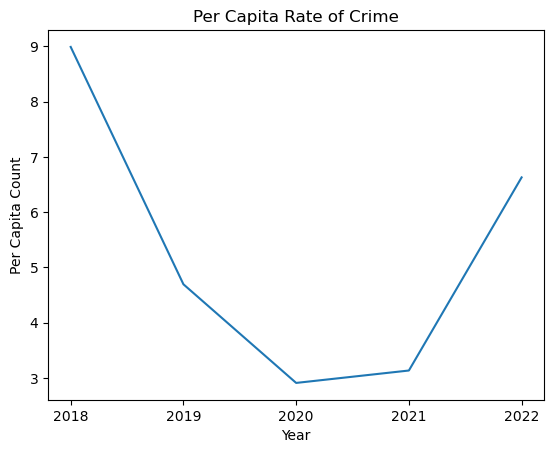

In [111]:
# Graph per capita crime rates over the 5 years
plt.plot(yearly_per_capita["Year"], yearly_per_capita["Per Capita Count"])

# Add labels
plt.xlabel("Year")
plt.ylabel("Per Capita Count")
plt.title("Per Capita Rate of Crime")

# Create new x-ticks
new_xticks = [2018, 2019, 2020, 2021, 2022]
plt.xticks(new_xticks)

plt.show()



In [113]:
# Look at per capita crime rate per district over the five year timespan
district_df = final_df[["Year", "District", "Primary Type", "Population", "Zipcode"]]
district_df

# Get the population per district, using lambda x: x[0] to ensure that the zip code has a unique population. Sum(level = 0) will ensure that 
# unique populations are summed for each district, thus not counting the same zip code's population twice
pop_per_district = district_df.groupby("District")["Population"].unique().apply(lambda x: x[0]).sum(level=0)

# Get the per capita crime count
cnt_per_district = district_df.groupby("District")["Primary Type"].count()

# Get the per capita crime count
per_cap_crime_cnt = cnt_per_district/pop_per_district

# Put in a data frame
district_per_capita = pd.DataFrame({"District" : per_cap_crime_cnt.index, "Per Capita Crime Count" : per_cap_crime_cnt.values})
district_per_capita

C:\Users\alici\AppData\Local\Temp\ipykernel_8028\820389877.py:7: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pop_per_district = district_df.groupby("District")["Population"].unique().apply(lambda x: x[0]).sum(level=0)


,District,Per Capita Crime Count
0,1,19.240568
1,2,1.650256
2,3,1.244916
3,4,0.773548
4,5,1.823319
5,6,1.097025
6,7,2.064217
7,8,0.603487
8,9,0.549644
9,10,0.623641


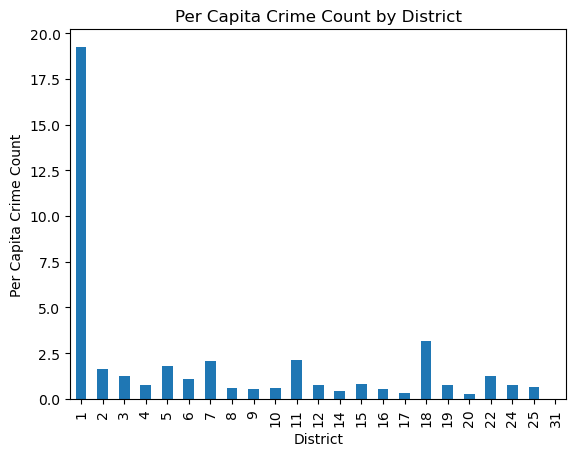

In [114]:
# Graph the results
district_per_capita.plot.bar(x='District', y='Per Capita Crime Count', legend=False)

# Set labels and title
plt.xlabel('District')
plt.ylabel('Per Capita Crime Count')
plt.title('Per Capita Crime Count by District')

# Display the plot
plt.show()

In [116]:
# Look at per capita crime rate per primary type over the five year timespan

# Get the population per primary type, using lambda x: x[0] to ensure that the zip code has a unique population. 
pop_per_type = district_df.groupby("Primary Type")["Population"].unique().apply(lambda x: x[0])

# Get the crime count
cnt_per_type = district_df.groupby("Primary Type")["Primary Type"].count()

# Get the per capita crime count
per_cap_crime_type = cnt_per_type/pop_per_type

# Put in a data frame
type_per_capita = pd.DataFrame({"Primary Type" : per_cap_crime_type.index, "Per Capita Crime Count" : per_cap_crime_type.values})
type_per_capita

,Primary Type,Per Capita Crime Count
0,ARSON,0.065198
1,ASSAULT & BATTERY,4.028824
2,DRUG RELATED,0.473049
3,HOMICIDE,0.055601
4,KIDNAPPING AND HUMAN TRAFFICKING,0.006285
5,MINOR PROPERTY CRIME,5.333669
6,NON-CRIMINAL (SUBJECT SPECIFIED),0.000083
7,OFFENSE INVOLVING CHILDREN,0.143841
8,OTHER MINOR CRIMES,4.498040
9,SEXUAL RELATED CRIME,0.110907


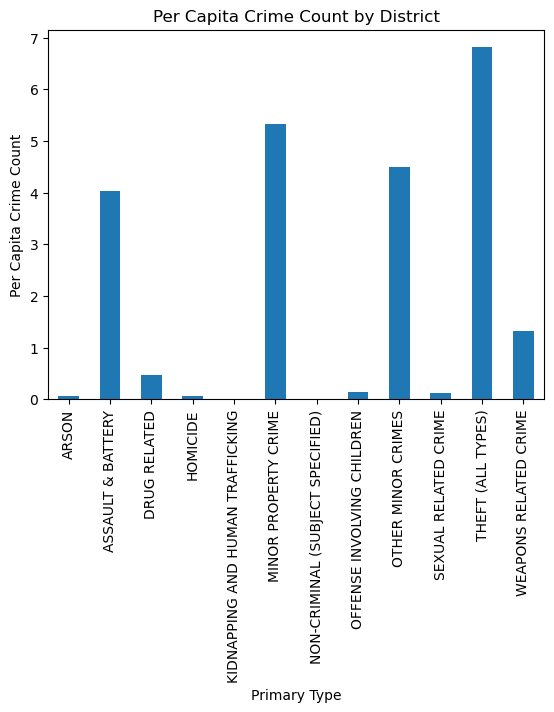

In [117]:
# Graph the results
type_per_capita.plot.bar(x='Primary Type', y='Per Capita Crime Count', legend=False)

# Set labels and title
plt.xlabel('Primary Type')
plt.ylabel('Per Capita Crime Count')
plt.title('Per Capita Crime Count by District')

# Display the plot
plt.show()